TP Integrador - Redes Neuronales.

Clasificación del agua para determinar si es potable o no

data set: https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier

In [73]:
csv = pd.read_csv('water_potability.csv')

csv.fillna(0, inplace=True)

csv.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [74]:
csv.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.966786,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.450000,0.000000
25%,5.283146,176.850538,15666.690297,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,6.735249,196.967627,20927.833607,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [75]:
csv_data = csv.drop('Potability', axis=1)
potability = csv['Potability']
csv_stats = csv_data.describe().T
csv_data_n = (csv_data - csv_stats['mean']) / csv_stats['std']
csv_n = pd.concat([csv_data_n, potability], axis=1)
csv_n.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000
mean,4.337868e-18,1.025906e-15,-4.554761e-17,5.205441e-16,-2.852148e-16,1.756836e-16,1.735147e-17,-1.323050e-16,5.552471e-16,0.390110
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487849
min,-2.058521e+00,-4.529762e+00,-2.473966e+00,-4.276635e+00,-1.732042e+00,-3.027828e+00,-3.653077e+00,-2.955622e+00,-3.225068e+00,0.000000
25%,-2.518270e-01,-5.936466e-01,-7.238810e-01,-6.284287e-01,-9.185162e-02,-7.481769e-01,-6.708163e-01,-4.364277e-01,-6.754064e-01,0.000000
50%,2.447532e-01,1.819146e-02,-1.238810e-01,5.067435e-03,4.391839e-01,-5.345119e-02,-2.014179e-02,1.092560e-01,-1.506775e-02,0.000000
75%,6.328245e-01,6.173390e-01,6.065606e-01,6.270101e-01,6.553481e-01,6.877555e-01,6.869921e-01,6.347264e-01,6.836823e-01,1.000000
max,2.729102e+00,3.855092e+00,4.472006e+00,3.793052e+00,1.545511e+00,4.047526e+00,4.236500e+00,2.851380e+00,3.552379e+00,1.000000


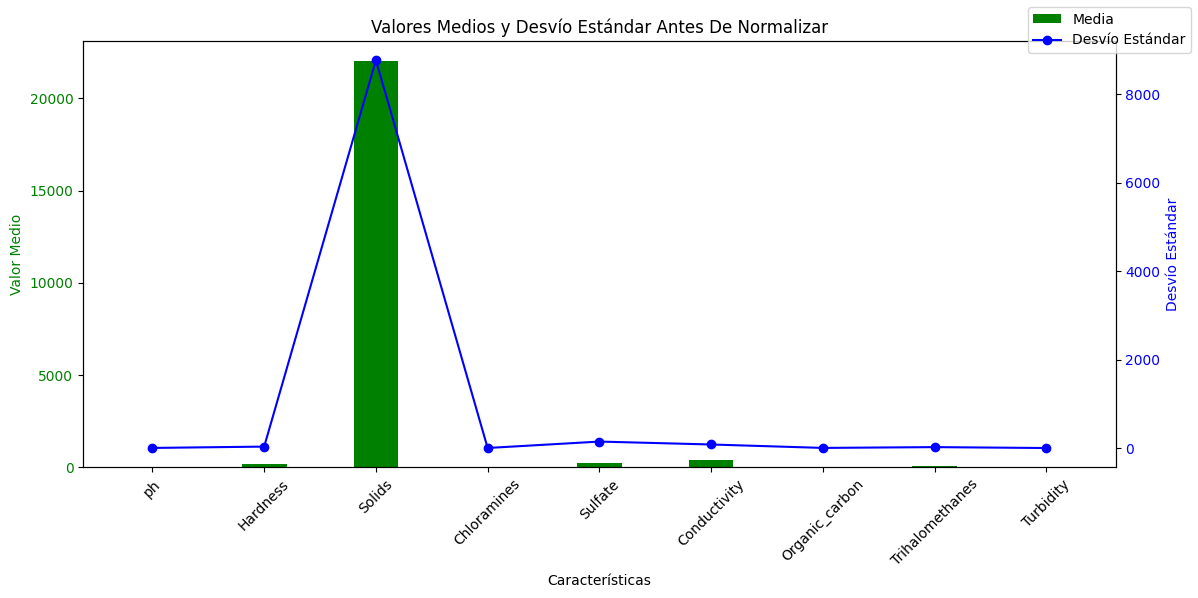

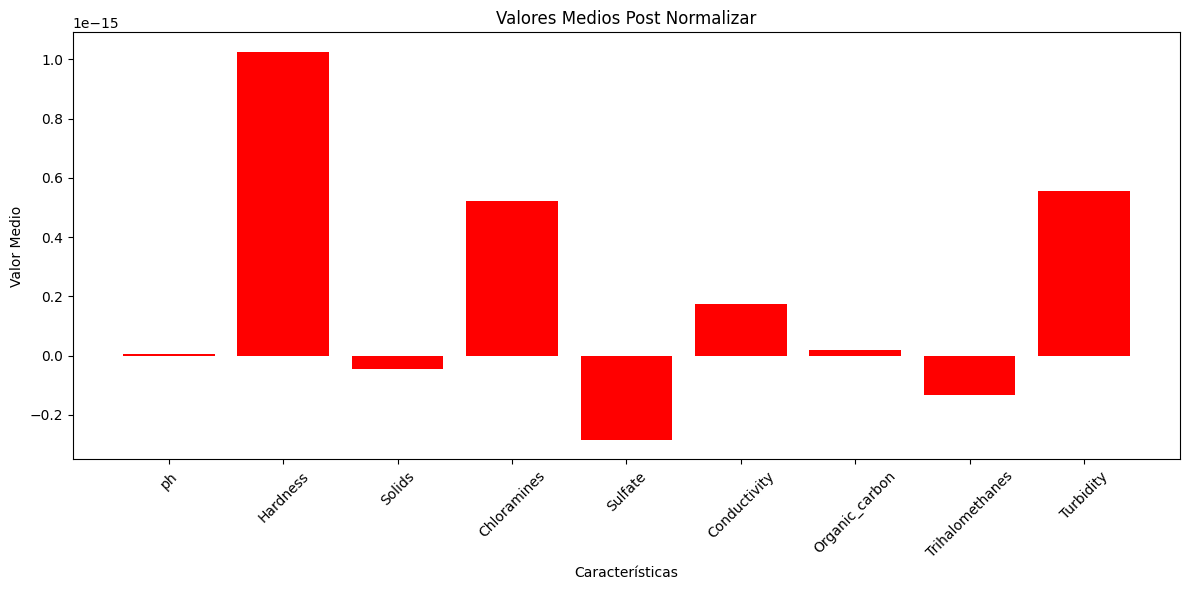

In [82]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x = np.arange(len(csv_data.columns))

ax1.bar(x, csv_data.describe().loc['mean'], bar_width, color='green', label='Media')
ax1.set_xlabel('Características')
ax1.set_ylabel('Valor Medio', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(x)
ax1.set_xticklabels(csv_data.columns, rotation=45)
ax1.set_title('Valores Medios y Desvío Estándar Antes De Normalizar')

ax2 = ax1.twinx()
ax2.plot(x, csv_data.describe().loc['std'], color='blue', marker='o', label='Desvío Estándar')
ax2.set_ylabel('Desvío Estándar', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

plt.figure(figsize=(12, 6))
plt.bar(csv_data.columns, csv_data_n.describe().loc['mean'], color='red')
plt.title('Valores Medios Post Normalizar')
plt.xlabel('Características')
plt.ylabel('Valor Medio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [77]:
csv_n.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.032591,-0.051277,-0.010452,-0.010128,0.030879,0.034793,0.013248,-0.009120,0.020390
Hardness,0.032591,1.000000,-0.046899,-0.030054,-0.031065,-0.023915,0.003610,-0.005691,-0.014449,-0.013837
Solids,-0.051277,-0.046899,1.000000,-0.070148,-0.026671,0.013831,0.010242,-0.023065,0.019546,0.033743
Chloramines,-0.010452,-0.030054,-0.070148,1.000000,0.002513,-0.020486,-0.012653,0.014974,0.002363,0.023779
Sulfate,-0.010128,-0.031065,-0.026671,0.002513,1.000000,-0.017943,0.029329,-0.011642,0.000244,0.011542
Conductivity,0.030879,-0.023915,0.013831,-0.020486,-0.017943,1.000000,0.020966,0.016318,0.005798,-0.008128
Organic_carbon,0.034793,0.003610,0.010242,-0.012653,0.029329,0.020966,1.000000,-0.013381,-0.027308,-0.030001
Trihalomethanes,0.013248,-0.005691,-0.023065,0.014974,-0.011642,0.016318,-0.013381,1.000000,-0.019066,0.021094
Turbidity,-0.009120,-0.014449,0.019546,0.002363,0.000244,0.005798,-0.027308,-0.019066,1.000000,0.001581
Potability,0.020390,-0.013837,0.033743,0.023779,0.011542,-0.008128,-0.030001,0.021094,0.001581,1.000000


[Text(0, 0, 'ph'),
 Text(0, 1, 'Hardness'),
 Text(0, 2, 'Solids'),
 Text(0, 3, 'Chloramines'),
 Text(0, 4, 'Sulfate'),
 Text(0, 5, 'Conductivity'),
 Text(0, 6, 'Organic_carbon'),
 Text(0, 7, 'Trihalomethanes'),
 Text(0, 8, 'Turbidity'),
 Text(0, 9, 'Potability')]

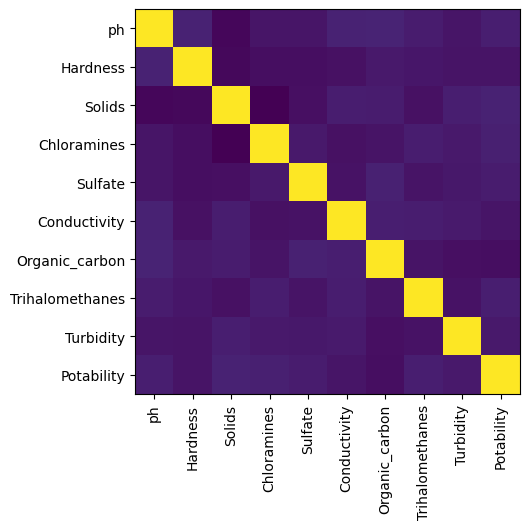

In [78]:
labels = csv_n.columns.to_list()
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow((csv_n.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(csv_n.columns.to_list(), rotation=90)
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(csv_n.columns.to_list(), ha='right')

In [98]:
X = csv_n.drop('Potability', axis=1)
y = csv_n['Potability']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo de regresión logística con descenso por gradiente
model = SGDClassifier(loss='log_loss', max_iter=10000, tol=1e-3)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.5929878048780488
